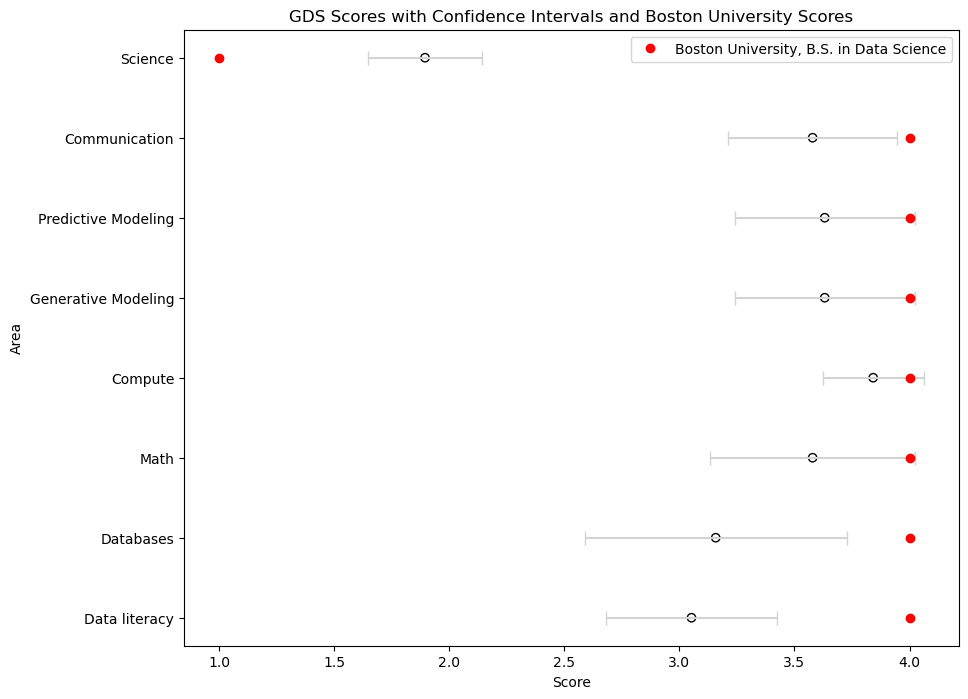

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
gds = pd.read_csv('data/scores-gds.csv')
# Calculate the mean scores and confidence intervals for each GDS area
areas = ['GDS.Data.literacy', 'GDS.Databases', 'GDS.Math', 'GDS.Compute', 'GDS.Generative.Modeling',
         'GDS.Predictive.Modeling', 'GDS.Communication', 'GDS.Science']

# Helper function to calculate mean and 95% confidence interval
def mean_confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    h = std * 1.96 / np.sqrt(n) # 95% confidence interval
    return mean, mean - h, mean + h

# Store the means and confidence intervals
means = []
conf_intervals = []

for area in areas:
    mean, lower, upper = mean_confidence_interval(gds[area])
    means.append(mean)
    conf_intervals.append((mean - lower, upper - mean))

# Convert the intervals into a format suitable for errorbar plotting (asymmetric error bars)
lower_errors = [conf[0] for conf in conf_intervals]
upper_errors = [conf[1] for conf in conf_intervals]
asymmetric_error = [lower_errors, upper_errors]

# Extract Boston University's scores for each area
bu_data = gds[gds['Institution'].str.contains('Boston University', case=False, na=False)]
bu_scores = [bu_data[area].mean() if not bu_data[area].empty else None for area in areas]


# Create the dot plot with confidence intervals
plt.figure(figsize=(10, 8))
area_names = [area.replace('GDS.', '').replace('.', ' ') for area in areas]
y_positions = range(len(area_names), 0, -1)
for i, y in enumerate(y_positions):
    plt.scatter(means[i], y, marker='o', edgecolor='black', facecolors='none', zorder=1)
plt.errorbar(means, y_positions, xerr=asymmetric_error, fmt='none', ecolor='lightgray', capsize=5, zorder=2)
# Plotting the Boston University data as red dots on top
plt.plot(bu_scores, y_positions, 'ro', label='Boston University, B.S. in Data Science', zorder=3)
plt.yticks(y_positions, area_names)
plt.xlabel('Score')
plt.ylabel('Area')
plt.title('GDS Scores with Confidence Intervals and Boston University Scores')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

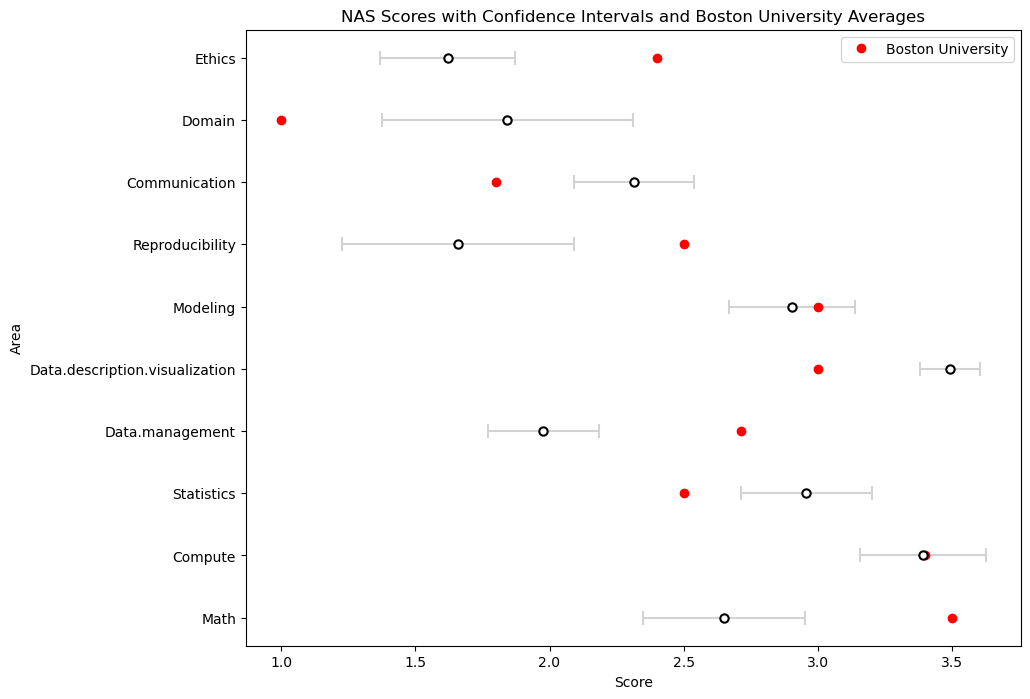

In [2]:
# Import data
nasem_data = pd.read_csv('data/scores-nasem.csv')
# Helper function to calculate the average scores for subcategories
def calculate_category_averages(df, category):
    category_columns = [col for col in df if col.startswith(category)]
    df[category] = df[category_columns].mean(axis=1)
    return df

# Define main categories from the dataset
main_categories = ['NASEM.Math', 'NASEM.Compute','NASEM.Statistics','NASEM.Data.management','NASEM.Data.description.visualization','NASEM.Modeling','NASEM.Reproducibility', 'NASEM.Communication','NASEM.Domain', 'NASEM.Ethics']

# Calculate the averages for each main category
for category in main_categories:
    nasem_data = calculate_category_averages(nasem_data, category)

# We will filter out the scores for Boston University
bu_nasem_data = nasem_data[nasem_data['Institution'].str.contains('Boston University', case=False, na=False)]
bu_nasem_scores = [bu_nasem_data[category].mean() if not bu_nasem_data[category].empty else None for category in main_categories]

nasem_means = []
nasem_conf_intervals = []

for category in main_categories:
    mean, lower, upper = mean_confidence_interval(nasem_data[category])
    nasem_means.append(mean)
    nasem_conf_intervals.append((mean - lower, upper - mean))

# Convert the intervals into a format suitable for errorbar plotting (asymmetric error bars)
lower_errors = [conf[0] for conf in nasem_conf_intervals]
upper_errors = [conf[1] for conf in nasem_conf_intervals]
asymmetric_error = [lower_errors, upper_errors]

# Create the dot plot with confidence intervals
plt.figure(figsize=(10, 8))
nasem_area_names = [category.replace('NASEM.', '') for category in main_categories]
y_positions = range(len(nasem_area_names), 0, -1)
plt.errorbar(nasem_means, y_positions, xerr=asymmetric_error, fmt='o', color='black', ecolor='lightgray', capsize=5, mfc='white', mec='black', mew=1.5)

# Plotting the Boston University data as red dots
plt.plot(bu_nasem_scores, y_positions, 'ro', label='Boston University')
plt.yticks(y_positions, nasem_area_names)
plt.xlabel('Score')
plt.ylabel('Area')
plt.title('NAS Scores with Confidence Intervals and Boston University Averages')
plt.legend()
plt.gca().invert_yaxis() 
plt.show()
